In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants as c

In [4]:
# the specifications are for jupyter earth system
R_planet = 7*10**7
R_star = 7*10**8
angle = np.pi/2
P = 3*10**7 
a = 1*10**11
#assumed
e = 0.2           
omega = 1.2
G =c.G
M_planet = 2*10**27
M_star = 2*10**30

In [5]:
delta = (R_planet/R_star)**2

#these times are for circular orbit
transit_t = (P/np.pi)*np.arcsin((((R_star + R_planet)**2 - (a*np.cos(angle))**2)**0.5)/(a*np.sin(angle)))
transit_f = (P/np.pi)*np.arcsin((((R_star - R_planet)**2 - (a*np.cos(angle))**2)**0.5)/(a*np.sin(angle)))


b_transit = a*np.cos(angle)*(1 - e**2)/(1+e*np.cos(omega))
b_occ = a*np.cos(angle)*(1 - e**2)/(1-e*np.cos(omega))

In [6]:
#Here I means relative intensity 
#linear model

def lin(mu):
    u = 0.3
    return  1- u*(1-mu)

#quadratic law

def quad(mu):
    u1 = 0.1
    u2 = 0.2
    return  1- u1*(1-mu) -u2*(1-mu)**2
#non-linear law
def nonlinear(mu):
    u1 = 0.05
    u2 = 0.05
    u3 = 0.15
    u4 = 0.05
    return  1-u1*(1-mu**0.5) -u2*(1-mu)-u3*(1 -mu**1.5)-u4*(1 - mu**2)

In [7]:
I_avg = 1       #since we are plotting relative intensity w.r.t to avg_intesity of star we need to find I_avg (without planet)

I_center = 1/0.9  #this is assumed not calculated 



In [8]:
# ok now lets introduce planet luminosity
r_coeff = 0.5
L_planet  = r_coeff*I_avg/4*(R_planet/a)**2

#including planet lminosity
Temp_star = 5700
Temp_planet = 140        # these values are of sun and jupyter

#intensity by planet is calculated by stefan boltzmann law
#the ratio of intensity of star to that of planet is proportional to ratio of respective temperature at longer wavelengths
#assuming planet and star act as black body

I_planet = (Temp_planet/Temp_star)   #I_planet w.r.t to star


delta_occ  = (L_planet+I_planet)*(R_planet/R_star)**2
print(delta_occ)

0.00024561464758771935


In [9]:
def ellipse(t):
    T = 0
    M = 2*np.pi*(t-T)/P
   
    
    E_1 = M
    E_0 = 0
    while abs(E_1-E_0)>0.1:
        
        S = M + e*np.sin(E_1)
        E_0 = E_1
        E_1 = S
        
        #print(E_1-E_0)
    E = E_1
    
    #v = true anomaly
    v = np.arccos((np.cos(E)-e)/(1-e*np.cos(E)))
    if E >np.pi:
        v = 2*np.pi - v
    
    return v

def vel_elliptical(t):
    f = ellipse(t)
    v_x = (G*M_star**2/((M_star+M_planet)*a*(1-e**2)))**0.5*(np.sin(omega +f)+e*np.sin(omega))
    return v_x
        

In [10]:



def cos(x,y):  
    if y==1:
        b=b_transit
    else :
        b=b_occ 
    X_t = ((R_star)**2 - b**2)**0.5
    r = ((X_t +R_planet - x)**2 + b**2)**0.5
    u = (1-(r/(R_star+R_planet))**2)**0.5
    return u
def area(x):
   
    alpha = np.arccos((R_planet-x)/R_planet)
    A = alpha*R_planet**2 - R_planet*np.sin(alpha)*(R_planet-x)
    return A


R_len_t = ((R_star)**2 - b_transit**2)**0.5
R_len_o = ((R_star)**2 - b_occ**2)**0.5

def planet_lumin(v):
    z = R_planet - R_planet*abs(np.cos(v-(np.pi/2-omega)))
  
    A = area(z)
    L = I_planet + A/(np.pi*R_planet**2)*r_coeff*I_avg/4*(R_planet/a)**2
    return L

In [11]:
mu3 =cos(2*R_planet,1)
I3 = lin(mu3)
delta3 = (I3-I_planet)*delta*I_center/I_avg

print(mu3)

0.5749595745760688


In [21]:

t = []
t = np.arange(0 , P  ,P/100000)
intensity = []

j=0
x_transit=0
x_occ = 0
for k in range (0,len(t),1):
    w = ellipse(t[k])
    
    if w <= np.pi/2 - omega :
        I = I_avg
        I_planet1 = planet_lumin(w)
        delt = (-I_planet1)*delta*I_center/I_avg
        intensity.append(1-delt)
        j=j+1
        
    elif  x_transit  >=0  and w > np.pi/2 - omega and x_transit < 2*R_len_t +2*R_planet:
        
        v = vel_elliptical(t[k])
       
        
        if x_transit <= 2*R_planet:
            mu =cos(2*R_planet,1)
            I = lin(mu)
            I_planet1 = planet_lumin(w)
            delt2 = (I-I_planet1)*delta*I_center/I_avg
            
            
            A =area(x_transit)
            delt =delt2*A/(np.pi*R_planet**2)
            intensity.append(1-delt)
          
        elif (x_transit > 2*R_planet and x_transit < (2*R_len_t )):
            
            mu = cos(x_transit,1)
            I = lin(mu)
            I_planet1 = planet_lumin(w)
            delta_i = (I-I_planet1)*delta*I_center/I_avg # I_avg is average intensity /max_intensity i.e (I_center)
            intensity.append(1-delta_i)
       
            
        elif  (x_transit  >=(2*R_len_t ) and x_transit<(2*R_len_t +2*R_planet)) :
            
            mu =cos(2*R_planet,1)
            I = lin(mu)
            I_planet1 = planet_lumin(w)
            delt2 = (I-I_planet1)*delta*I_center/I_avg
            
            A =area((2*R_len_t +2*R_planet) - x_transit)
            delt =delt2*A/(np.pi*R_planet**2)
            intensity.append(1-delt)
            
        else:
            
            I_planet1 = planet_lumin(w)
            delt = (-I_planet1)*delta*I_center/I_avg
            intensity.append(1-delt)    
        x_transit = x_transit + (t[k+1] -t[k])*v 
        
    
    
    elif  x_transit>(2*R_len_t +2*R_planet) and w < 3*np.pi/2-omega:
        I = I_avg
        I_planet1 = planet_lumin(w)
        delt2 = (-I_planet1)*delta*I_center/I_avg
        intensity.append(1-delt2)

    elif   w >= 3*np.pi/2-omega  and  x_occ  <2*R_planet + 2*R_len_o:
        v = vel_elliptical(t[k])
        x_occ = x_occ + -(t[k] -t[k-1])*v
           
        if x_occ< 2*R_planet:
            A =area(x_occ)
            delt =delta_occ*A/(np.pi*R_planet**2)
            intensity.append(1-delt)  
           
        elif  (x_occ >= 2*R_planet and x_occ< 2*R_len_o) :
        
            intensity.append(1-delta_occ)
     
        elif  (x_occ >=(2*R_len_o ) and x_occ < (2*R_len_o +2*R_planet)) :
        
           
            A =area(-x_occ+(2*R_len_o +2*R_planet))
            delt =delta_occ*A/(np.pi*R_planet**2)
            intensity.append(1-delt)
            
        else:
            I=I_avg
            I_planet1 = planet_lumin(w)
            delt2 = (I_planet1)*delta*I_center/I_avg
            intensity.append(1-delt2)

            
            
    
    elif x_occ >= (2*R_star +2*R_planet):
        I = I_avg
        I_planet1 = planet_lumin(w)
        delt2 = (-I_planet1)*delta*I_center/I_avg
        intensity.append(1-delt2)

Text(0.5, 0, 'time in sec')

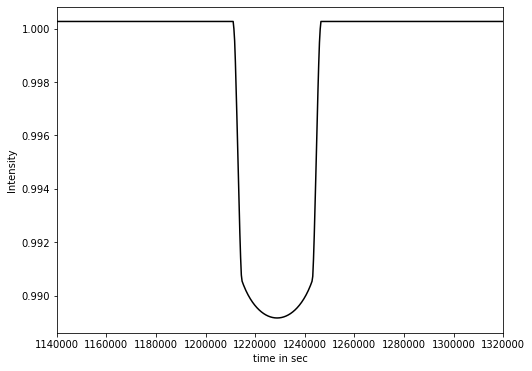

In [23]:
plt.figure(figsize=(8,6))
plt.plot(t,intensity,'k')
plt.xlim(0.0380*P,0.0440*P)
plt.ylabel('Intensity')
plt.xlabel('time in sec')